In [1]:
import pandas as pd 

In [61]:
df = pd.read_csv('SteinerTree-PACE-2018-instances-master/track3.csv')

In [55]:
df.head()

,paceName,lower,upper
0,instance001.gr,2256,2256
1,instance002.gr,15076,15076
2,instance003.gr,17803,17803
3,instance004.gr,23765,23765
4,instance005.gr,21757,21757


In [56]:
import os

directory = 'SteinerTree-PACE-2018-instances-master/Track3'

# List all files in the directory
files = os.listdir(directory)

# Print the list of files
# for file in files :
#     if file.endswith('.gr'):
#         print(file)


In [62]:
# instance name
# node count
# edge count
# terminal count
# solution cost
# lower bound (track3.csv)
# upper bound(track3.csv)
# approx. ratio (soon cost/lower bound cost)
# time taken (in ms)

df['node_count'] = 0 
df['edge_count'] = 0 
df['terminal_count'] = 0 
df['solution_cost'] = 0 
df['approx_ratio'] = 0 
df['time'] = 0 

In [58]:
df.head()

,paceName,lower,upper,node_count,edge_count,terminal_count,solution_cost,approx_ratio,time
0,instance001.gr,2256,2256,0,0,0,0,0,0
1,instance002.gr,15076,15076,0,0,0,0,0,0
2,instance003.gr,17803,17803,0,0,0,0,0,0
3,instance004.gr,23765,23765,0,0,0,0,0,0
4,instance005.gr,21757,21757,0,0,0,0,0,0


In [63]:
for i,in_file in enumerate(df['paceName']):
    print(in_file)
    res_file = in_file.split('.')
    res_file = ''.join([res_file[0],'_output.',res_file[1]])
    print(res_file)

    with open(directory+'/'+in_file,'r') as file:
        input = file.readlines()
    with open(directory+'/'+res_file,'r') as file:
        output = file.readlines()

    # if output is empty then return
    if len(output) == 0:
        continue
    node_count = input[1].split(' ')[1]
    #remove the newline character
    node_count = node_count[:-1] 
    df.loc[i,'node_count'] = node_count 
    edge_count = input[2].split(' ')[1] 
    edge_count = edge_count[:-1]
    df.loc[i,'edge_count'] = edge_count 

    j = 3 
    while not input[j].startswith('Terminals'):
        j+=1 
    terminal_count = input[j].split(' ')[1]
    terminal_count = terminal_count[:-1] 
    df.loc[i,'terminal_count'] = terminal_count 
    solution_cost = output[-3]
    solution_cost = solution_cost[:-1] 
    df.loc[i,'solution_cost'] = solution_cost    
    approx_ratio = float(solution_cost)/float(df.loc[i,'lower']) 
    df.loc[i,'approx_ratio'] = approx_ratio
    time = output[-1]
    # extract the numerical part
    time = time.split(' ')[1]    
    df.loc[i,'time'] = time

    out_node_count = output[1].split(' ')[1]
    #remove the newline character
    out_node_count = out_node_count[:-1] 
    df.loc[i,'out_node_count'] = out_node_count 
    


instance001.gr 
instance001_output.gr 
instance002.gr 
instance002_output.gr 
instance003.gr 
instance003_output.gr 
instance004.gr 
instance004_output.gr 
instance005.gr 
instance005_output.gr 
instance006.gr 
instance006_output.gr 
instance007.gr 
instance007_output.gr 
instance008.gr 
instance008_output.gr 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\1557112198.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6405' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'node_count'] = node_count
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\1557112198.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10454' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'edge_count'] = edge_count
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\1557112198.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'terminal_count'] = terminal_count
C:\Users\Lenovo\AppData\Local\Temp\ipykern

instance009.gr 
instance009_output.gr 
instance010.gr 
instance010_output.gr 
instance011.gr 
instance011_output.gr 
instance012.gr 
instance012_output.gr 
instance013.gr 
instance013_output.gr 
instance014.gr 
instance014_output.gr 
instance015.gr 
instance015_output.gr 
instance016.gr 
instance016_output.gr 
instance017.gr 
instance017_output.gr 
instance018.gr 
instance018_output.gr 
instance019.gr 
instance019_output.gr 
instance020.gr 
instance020_output.gr 
instance021.gr 
instance021_output.gr 
instance022.gr 
instance022_output.gr 
instance023.gr 
instance023_output.gr 
instance024.gr 
instance024_output.gr 
instance025.gr 
instance025_output.gr 
instance026.gr 
instance026_output.gr 
instance027.gr 
instance027_output.gr 
instance028.gr 
instance028_output.gr 
instance029.gr 
instance029_output.gr 
instance030.gr 
instance030_output.gr 
instance031.gr 
instance031_output.gr 
instance032.gr 
instance032_output.gr 
instance033.gr 
instance033_output.gr 
instance034.gr 
instance0

In [64]:
df.to_csv('result_track3.csv')
#convert all numerical strings to integers
df = df.apply(pd.to_numeric, errors='ignore')
# delete all columns with node count 0
df = df[df.node_count != 0]
print(df.size/10)
print(df.head())

146.0
          paceName  lower  upper  node_count  edge_count  terminal_count  \
0  instance001.gr    2256   2256        6405       10454              16   
1  instance002.gr   15076  15076        7998       14734              16   
2  instance003.gr   17803  17803        8007       14743              24   
3  instance004.gr   23765  23765       19083       35636              24   
4  instance005.gr   21757  21757        8013       14749              30   

   solution_cost  approx_ratio  time out_node_count  
0           2311      1.024379   671            340  
1          16615      1.102083   924            340  
2          19139      1.075044  1101            393  
3          25631      1.078519  4305            524  
4          23701      1.089351  1605            476  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\3228720142.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


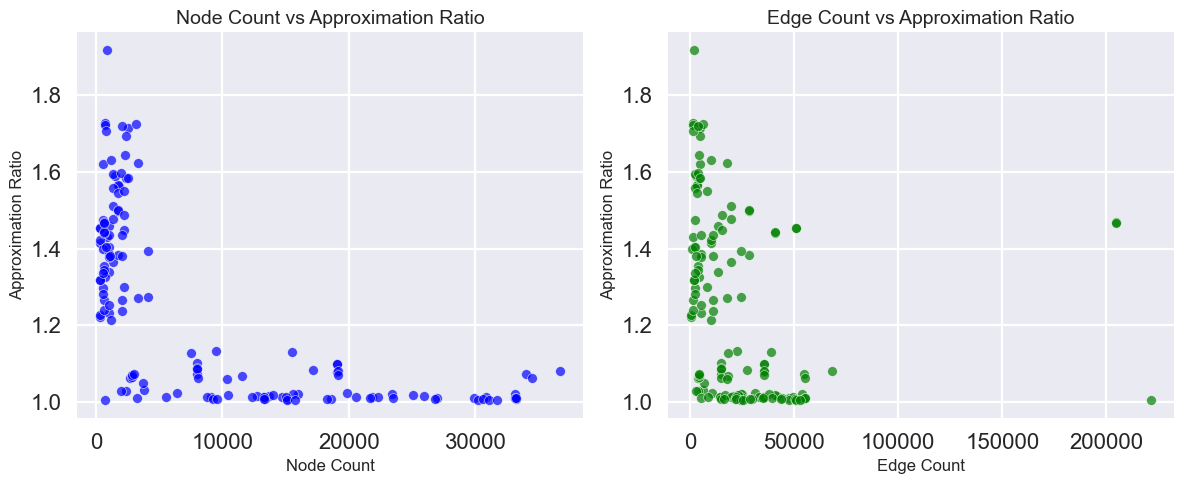

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Set style
plt.style.use('seaborn-darkgrid')

# Create figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for node count vs approximation ratio
axes[0].scatter(df['node_count'], df['approx_ratio'], color='blue', alpha=0.7, edgecolors='w', marker='o',s=50)
axes[0].set_xlabel('Node Count', fontsize=12)
axes[0].set_ylabel('Approximation Ratio', fontsize=12)
axes[0].set_title('Node Count vs Approximation Ratio', fontsize=14)
axes[0].grid(True)

# Scatter plot for edge count vs approximation ratio
axes[1].scatter(df['edge_count'], df['approx_ratio'], color='green', alpha=0.7, edgecolors='w', marker='o',s=50)
axes[1].set_xlabel('Edge Count', fontsize=12)
axes[1].set_ylabel('Approximation Ratio', fontsize=12)
axes[1].set_title('Edge Count vs Approximation Ratio', fontsize=14)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


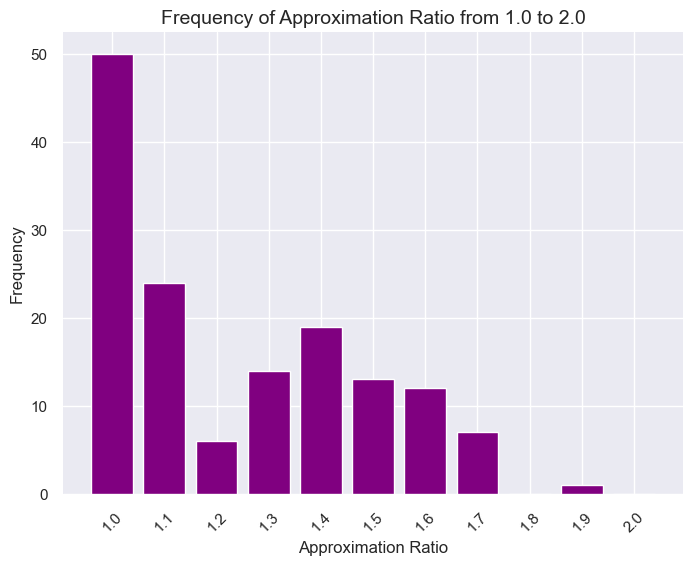

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\2358408369.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


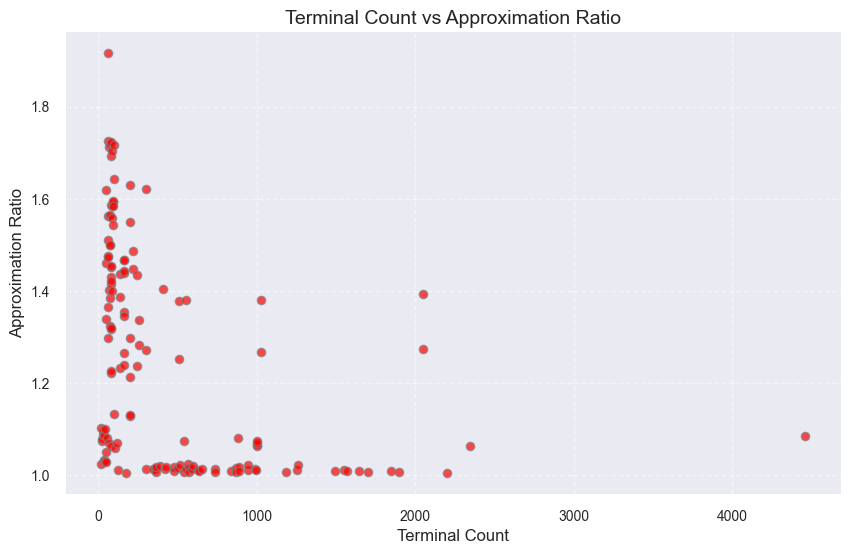

In [50]:
# generate approximation ratio vs frequency graph
import matplotlib.pyplot as plt
import numpy as np

# Round approximation ratios to the nearest 0.1
df['rounded_ratio'] = df['approx_ratio'].apply(lambda x: round(x * 10) / 10)

# Create bins for the bar plot
bins = np.linspace(1.0, 2.0, 11)

# count frequence of each bin and store in frequency
frequency = []
for i in range(0, 11):
    frequency.append(df[df['rounded_ratio'] == 1 + i/10].shape[0])

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 12), frequency, color='purple', width=0.8)

# Set x-axis ticks and labels
plt.xticks(np.arange(1, 12), [f'{x:.1f}' for x in bins], rotation=45)

# Add labels and title
plt.xlabel('Approximation Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Approximation Ratio from 1.0 to 2.0', fontsize=14)

# Show plot
plt.show()




# generate terminal count vs approximation ratio graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-darkgrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['terminal_count'], df['approx_ratio'], color='red', alpha=0.7, edgecolors='grey')

# Add labels and title
plt.xlabel('Terminal Count', fontsize=12)
plt.ylabel('Approximation Ratio', fontsize=12)
plt.title('Terminal Count vs Approximation Ratio', fontsize=14)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3348\3481492999.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


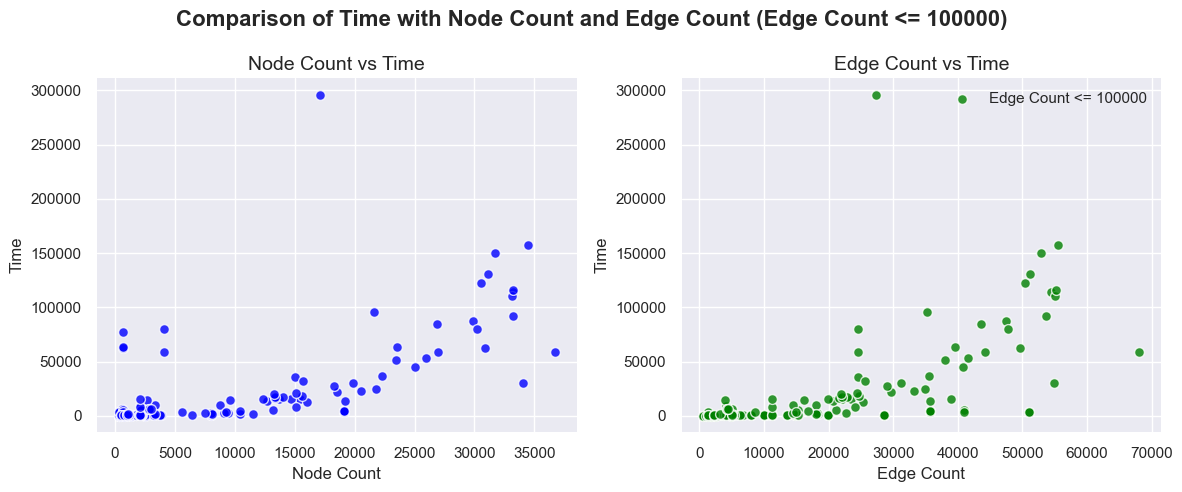

In [41]:
import matplotlib.pyplot as plt

# Filter data for edge count <= 100000
filtered_df = df[df['edge_count'] <= 100000]

# Set style
plt.style.use('seaborn-darkgrid')

# Create figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for node count vs time
axes[0].scatter(df['node_count'], df['time'], color='blue', alpha=0.8, edgecolors='w', marker='o',s=50)
axes[0].set_xlabel('Node Count', fontsize=12)
axes[0].set_ylabel('Time', fontsize=12)
axes[0].set_title('Node Count vs Time', fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Scatter plot for edge count vs time
axes[1].scatter(filtered_df['edge_count'], filtered_df['time'], color='green', alpha=0.8, edgecolors='w', marker='o', label='Edge Count <= 100000',s=50)
axes[1].set_xlabel('Edge Count', fontsize=12)
axes[1].set_ylabel('Time', fontsize=12)
axes[1].set_title('Edge Count vs Time', fontsize=14)
axes[1].grid(True)
axes[1].legend()

# Set common title for subplots
plt.suptitle('Comparison of Time with Node Count and Edge Count (Edge Count <= 100000)', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Read data from output.csv
df = pd.read_csv('output.csv')

In [12]:
df['terminal_count'].max()

22

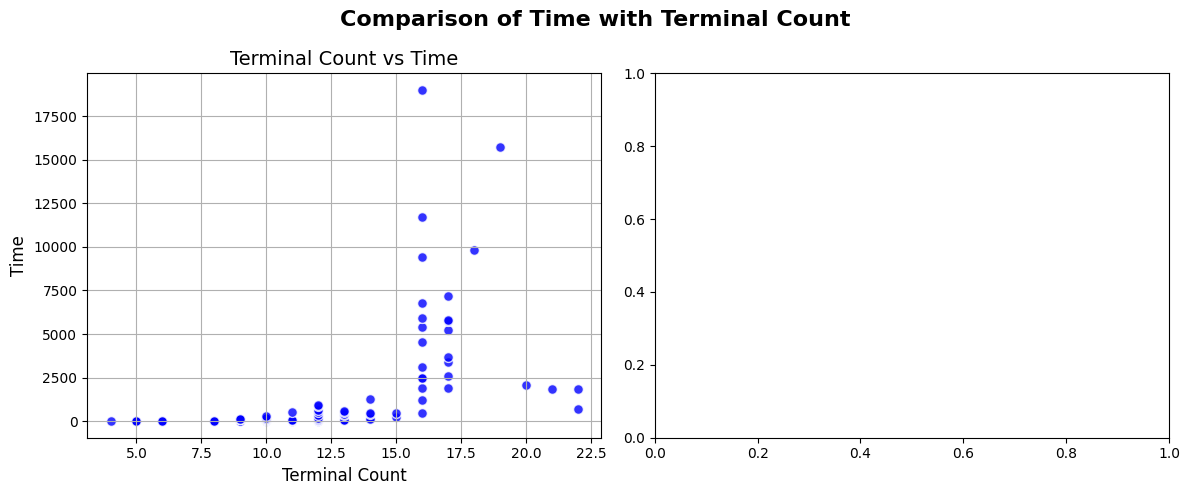

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Read data from output.csv
df = pd.read_csv('output.csv')
df = df[df['time'] <= 25000]
filtered_df = df[df['edge_count'] <= 20000]

# Set style
# plt.style.use('seaborn-darkgrid')

# Create figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for node count vs time
axes[0].scatter(df['terminal_count'], df['time'], color='blue', alpha=0.8, edgecolors='w', marker='o', s=50)
axes[0].set_xlabel('Terminal Count', fontsize=12)
axes[0].set_ylabel('Time', fontsize=12)
axes[0].set_title('Terminal Count vs Time', fontsize=14)
axes[0].grid(True)

# Set common title for subplots
plt.suptitle('Comparison of Time with Terminal Count', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
